# Gathering Real-time GTFS Data

Importing stop data from LA Metro and Santa Monica Big Blue Bus and constraining to the Palisades and Sunset evacuation zones.

In [9]:
import pandas as pd
metrostops = pd.read_csv('GTFS Data/gtfs_bus (1)/stops.txt')
metrostops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station,tpis_name
0,1,1,Paramount / Slauson,NaN,33.973248,-118.113113,NaN,NaN,NaN,NaN
1,3,3,Jefferson / 10th,NaN,34.025471,-118.328402,NaN,NaN,NaN,NaN
2,6,6,120th / Augustus F Hawkins,NaN,33.924696,-118.242222,NaN,NaN,NaN,NaN
3,7,7,120th / Martin Luther King Hospital,NaN,33.924505,-118.240369,NaN,NaN,NaN,NaN
4,12,12,15054 Sherman Way,NaN,34.201075,-118.461953,NaN,NaN,NaN,NaN


In [10]:
import geopandas as gpd
metrostopsGdf = gpd.GeoDataFrame(metrostops,geometry = gpd.points_from_xy(metrostops.stop_lon,metrostops.stop_lat),crs='EPSG:4326')

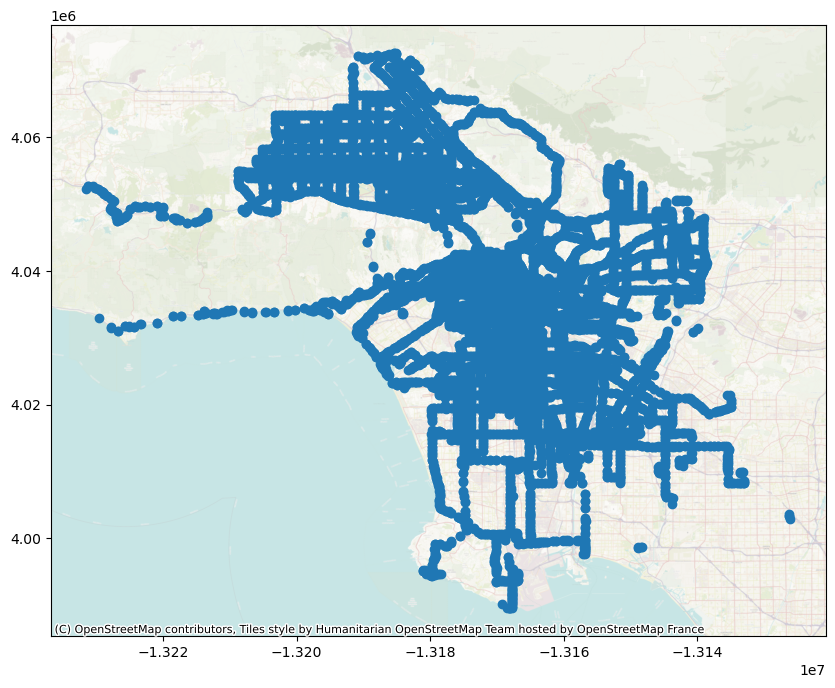

In [8]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(10,10))
metrostopsGdf.to_crs('EPSG:3857').plot(ax=ax)
ctx.add_basemap(ax=ax, alpha=0.5, zoom=13)

In [13]:
pal_perim = gpd.read_file('GTFS Data/Palisades_Perimeter_20250121.zip')
pal_perim.head()

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,1182.082031,267.101144,"POLYGON ((-13193543.302 4032913.077, -13193543..."
1,2,Heat Perimeter,2222.488281,185.498783,"POLYGON ((-13193524.155 4033067.953, -13193524..."
2,3,Heat Perimeter,21.011719,22.412814,"POLYGON ((-13193598.085 4033158.222, -13193598..."
3,4,Heat Perimeter,214.992188,76.639180,"POLYGON ((-13193654.249 4033146.033, -13193656..."
4,5,Heat Perimeter,44203.453125,1569.259764,"POLYGON ((-13194209.58 4033236.32, -13194209.5..."


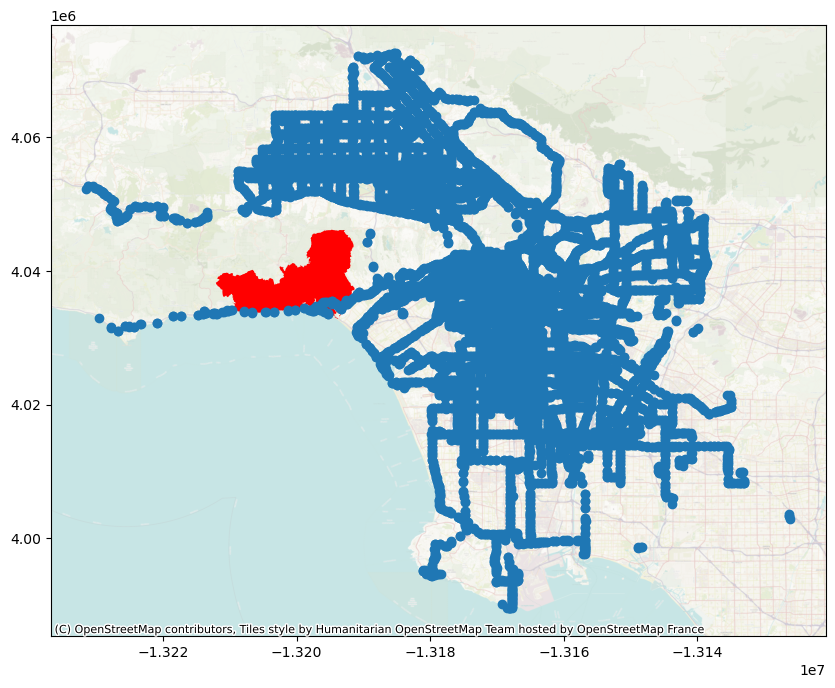

In [15]:
import matplotlib.pyplot as plt
import contextily as ctx
fig, ax = plt.subplots(figsize=(10,10))
pal_perim.to_crs('EPSG:3857').plot(color='r',ax=ax)
metrostopsGdf.to_crs('EPSG:3857').plot(ax=ax)
ctx.add_basemap(ax=ax, alpha=0.5, zoom=13)

Maximum Intent Evacuation Zones